Anything that is recorded repeatedly at many points in time forms a time series.

Many time series are fixed frequency - data points occur at regular intervals according to some rules.

How to mark or refer time series data:

- Timestamps: specific instants in time
- Fixed period: Such as whole month or whole year
- Intervals of time: Indicated by a start and end timestamp. Periods can be thought of as special cases of intervals.
- Experiment or elapsed time: Each timestamp is a measure if time related to a particular start time. (The index may be an integer or floating-point number indicating elapsed time from the start of the experiment)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 11.1 Date and Time Data Types and Tools


In [2]:
from datetime import datetime, timedelta

now = datetime.now()
now
now.year, now.month, now.day

# datetime stores both the date and time down to the microsecond.
# datetime.timedelta represents the temporal difference between two datetime objects

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days, delta.seconds

# Add or substract a timedelta or multipole to a datetime object to yield a new shifted object
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)


datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime


In [ ]:
# Format datetime objects and pandas Timestamp objects as strings using str or strftime method

stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime("%Y-%m-%d")

# Use same format code convert strings to date
value = "2011-01-03"

# use datetime.strptime to parse a date with a known format
datetime.strptime(value, "%Y-%m-%d")
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]


## Pandas datetime object

use to_datetime to parse string to date time.
datetime objects also have a number of local-specific formatting options for systems in other countries or languages.


In [ ]:
# pandas.to_datetime method parses different kinds of date representations, e.g. ISO8601 formats
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]

pd.to_datetime(datestrs)


# NaT(Not a Time) is pandas's null value for timestamp data
idx = pd.to_datetime(datestrs + [None])
idx


# 11.2 Time Series Basics

A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented outside of pandas as Python strings or datetime objects


In [ ]:
dates = [
    datetime(2011, 1, 2),
    datetime(2011, 1, 5),
    datetime(2011, 1, 7),
    datetime(2011, 1, 8),
    datetime(2011, 1, 10),
    datetime(2011, 1, 12),
]

ts = pd.Series(np.random.standard_normal(6), index=dates)

ts


In [ ]:
# perform arithmetic operation between differently indexed time series.
# [::2] selects every second elements in ts
ts + ts[::2]


In [ ]:
# Find the index data type
ts.index.dtype


In [ ]:
ts.index


In [ ]:
# scalar values from a datetimeIndex are pandas timestamp objects

stamp = ts.index[0]
stamp


A pandas.Timestamp can be substituted most places where your would use a datetime object. But reverse it not true.
pandas.Timestamp can store nano seconds and frequency information, where datetime object cannot.


## Indexing, Selection, Subsetting

Time series behaves like any other Series when you are indexing and selecting data based on the label.


In [ ]:
# Select by index
stamp = ts.index[2]

ts[stamp]


In [ ]:
# Select by string that is interpretable as a date
# Both of these 3 works
ts["2011/01/10"]
ts["20110110"]
ts["2011-01-10"]


In [ ]:
# Pace a year or a month to select slices of data
longer_ts = pd.Series(
    np.random.standard_normal(1000), index=pd.date_range("2011-01-01", periods=1000)
)


In [ ]:
longer_ts["2012"]

# Select the month
longer_ts["2012-02"]

# Select by datetime object
ts[datetime(2011, 1, 7)]

# If time stamps not contained in a time series, the range still can be selected
ts["2011-01-06":"2011-01-11"]

# use truncate slice a series between two dates
ts.truncate(after="2011-01-09")


In [ ]:
times = ts.truncate(after="2011-01-09")
times[:] = np.nan


In [ ]:
ts


In [ ]:
times


In [ ]:
#  Indexing is same for DataFrame

dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")

long_df = pd.DataFrame(
    np.random.standard_normal((100, 4)),
    index=dates,
    columns=["Coloradi", "Texas", "New York", "Ohio"],
)

long_df.loc["2001-05"]


## Time Series with Duplicated Indices

When there are multiple observations failing on a particular timestamp.


In [ ]:
dates = pd.DatetimeIndex(
    ["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"]
)

dup_ts = pd.Series(np.arange(5), index=dates)


In [ ]:
dup_ts.index.is_unique


In [ ]:
# To aggregate the data having nonunique timestamps

grouped = dup_ts.groupby(level=0)

# To get the dataframe without duplications
grouped.mean()


# 11.3 Date Ranges, Frequencies and Shifting

Generic time series in pandas are assumed to be irregular - no fixed frequencies.

Convert the sample time series to fixed daily frequency buy calling resample.


In [ ]:
resampler = ts.resample("D")

# use resampler.mean() to convert the resampler object to DataFrame
resampler.mean()


## Generating Date Ranges

`pandas.date_range` is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency.


In [ ]:
# By default, pandas.date_range generates daily timestamps.
index = pd.date_range("2012-04-01", "2012-06-01")

# Pass only a start or end date, must pass a number of periods to generate
# generate 20 days timestamps starts from 2012-04-01
pd.date_range(start="2012-04-01", periods=20)

# frequency "BM" stands to BusinessMonthEnd
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

# date_range preserves the time of start and end timestamp
pd.date_range("2012-05-02 12:56:31", periods=5)

# Normalize the timestamp by passing the normalize option
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)


## Frequencies and Dare Offsets

Frequencies in pandas are composed of a base frequency and a multiplier.
Base frequencies are refereed to by a string alias. "M" for monthly , 'H' for hourly

For each base frequency there is an object referred to as a date offset.


In [ ]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

four_hours = Hour(4)
four_hours

# Putting an integer before the base frequency to create a multiple
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

# combine offsets by addition
Hour(2) + Minute(30)

pd.date_range("2000-01-01", periods=10, freq="1h30min")


## Week of month dates

Frequency class starting with WOM enables you to get dates like the third Friday of each month


In [ ]:
# get every 3rd Friday of each week from start to end
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")

monthly_dates


## Shifting (Leading and Lagging) Data

Shifting refers to moving data backword and forward through time.

Both Series and DataFrame have a shift method for doing naive shifts forward ot backword, leaving the index unmodified.


In [ ]:
ts = pd.Series(
    np.random.standard_normal(4), index=pd.date_range("2000-01-01", periods=4, freq="M")
)

ts.shift(2)
ts.shift(-2)

# use shift to computing consecutive percent changes in a time series or multiple time series as DataFrame columns
ts / ts.shift(1) - 1

# Naive shifts leave the index unmodified
# If frequency is known, the shift is moving the timestamps instead of the data
ts.shift(2, freq="M")

ts.shift(3, freq="D")

# T stands for minutes.
# the freq parameter indicates the offset to apply to the timestamps, it does not change the underlaying frequency of the data
ts.shift(1, freq="90T")


### Shifting dates with offsets

The pandas date offsets can also be used with datetime or Timestamp objects.


In [ ]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 7)

now + 3 * Day()

# Anchored offsets can "roll" dates forward or backward
offset = MonthEnd()

# rollforward to the nearest month end
offset.rollforward(now)

# rollback now to the nearedt month end
offset.rollback(now)

# Use these methods with groupby
ts = pd.Series(
    np.random.standard_normal(20),
    index=pd.date_range("2000-01-15", periods=20, freq="4D"),
)

# rollforward all time to end of the month and group by index
# calculate the mean() value to return a dataframe
ts.groupby(MonthEnd().rollforward).mean()
# Same as below
ts.resample("M").mean()


# 11.4 Time Zone Handling

Time zones are expressed as offsets from UTC

Python time zone information comes from pytz library.


In [ ]:
import pytz

pytz.common_timezones[-5:]

# to get a time zone object from pytz, use pytz.timezone
tz = pytz.timezone("America/New_York")

tz


## Time Zone Localization and Conversion

By default, time series in pandas are time zone naive.


In [ ]:
dates = pd.date_range("2012-03-09 09:30", periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

print(ts.index.tz)  # None by default

# To set a date range with a timezone
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

# Use `tz_localize` method to convert naive to localized
ts_utc = ts.tz_localize("UTC")

# Once a time series has been localized to a particular timezone
# it can be converted to another timezone with tz_convert
ts_utc.tz_convert("America/New_York")


## Operations with Time Zone-Aware Timestamp Objects

Individual Timestamp object can be localized from naive to time zone-aware
and converted from one time zone to another.


In [ ]:
stamp = pd.Timestamp("2011-03-12 04:00")

stamp_utc = stamp.tz_localize("utc")

stamp_utc.tz_convert("Asia/Shanghai")

# pass time zone argument when create the TimeStamp
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")

# change time zone doesn't alter the internal UTC value
stamp_utc.value == stamp_utc.tz_convert("Asia/Singapore").value  # True


## Operations Between Different Time Zones

If two time series with different time zone are combined
The result will be UTC.


In [ ]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")

result = ts1 + ts2

result


# 11.5 Periods and Period Arithmetic

Periods represent time spans (days, months, quarters)

pandas.Period class represents Periods data type, requiring a string or integer and a supported frequency


In [ ]:
# A Period object represents the full time span from Jan 1 2011 to dec 31 2011, entire year
p = pd.Period("2011", freq="A-DEC")

# Adding and subtracting integers from periods will shift the period frequency
p + 5

# If two periods have the same frequency, their difference is the number of units between then as a date offset
pd.Period("2014", freq="A-DEC") - p

# Regular ranges of periods can be constructed with the period_range function
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

# PeriodIndex class stores a sequence of periods and can serve as an axis index in any pandas data structure.
pd.Series(np.random.standard_normal(6), index=periods)


## Period Frequency Conversion

Periods and PeriodIndex can be converted to another frequency with `asfreq` method.


In [2]:
# Convert annual period to monthly period
p = pd.Period("2011", freq="A-DEC")

p.asfreq("M", how="start")

p.asfreq("M", how="end")

# For a fiscal year (financial year) ending on a month other than December
# the corresponding monthly subsperiods are different
p = pd.Period("2011", freq="A-JUN")

# The fiscal year will start on July and end on June
p.asfreq("M", how="start")
p.asfreq("M", how="end")

# Convert PeriodIndex objects
periods = pd.period_range("2006", "2009", freq="A-DEC")

ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)

# Change the frequency of the year to 1st month of the year
ts.asfreq("M", how="start")

# Get the last business day of the year
ts.asfreq("B", how="end")


2006-12-29   -0.373924
2007-12-31    0.863468
2008-12-31    0.505879
2009-12-31   -2.165758
Freq: B, dtype: float64

## Quarterly Period Frequencies

Much quarterly data is reported relative to a fiscal year end.


In [ ]:
p = pd.Period("2012Q4", freq="Q-JAN")

# Check the start and end of fiscal year by check the daily frequency
p.asfreq("D", how="start")
p.asfreq("D", how="end")

# Get timestamp of 4 p/m. on the second-to-ast business day of the quarter
p4pm = (p.asfreq("B", how="END") - 1).asfreq("T", how="start") + 16 * 60

p4pm

p4pm.to_timestamp().timetz()

# Generate quarterly ranges
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")

ts = pd.Series(np.arange(len(periods)), index=periods)

# Get the 2nd last business day of each quarter and second hour
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 1

ts


In [ ]:
ts.index = new_periods
ts


##


## Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods with the to_period method.


In [ ]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")

ts = pd.Series(np.random.standard_normal(3), index=dates)

pts = ts.to_period()

pts


Periods refer to nonoverlapping time spaces, a timestamp can only belong to a single period for a given frequency.


In [ ]:
dates = pd.date_range("2000-01-29", periods=6)

ts2 = pd.Series(np.random.standard_normal(6), index=dates)

ts2.to_period("M")

# To convert back to timestamps, use the to_timestamp method
pts = ts2.to_period()

pts

# convert to the end timestamp of the day.
pts.to_timestamp(how="end")


## Creating a PeriodIndex from Arrays

When fixed frequency datasets stored with timespan information spread across multiple columns.


In [21]:
data = pd.read_csv("./datasets/macrodata.csv")

data.head()

# passing different frequency arrays to PeriodIndex with a frequency
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"], freq="Q-DEC")

data.index = index

data["infl"]


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling and Frequency Conversion

Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called **downsampling**, converting lower frequency to higher frequency is called **upsampling**.

Special cases, convert W-WED (weekly on Wednesdays) to W-FRI (weekly on Fridays) is neither both.

Use pandas objects' `resample` method for all frequency conversion.
Resample has a similar API to `groupby`, call resample to group the data then call an aggregation function.


In [12]:
dates = pd.date_range("2000-01-01", periods=100)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

# Resample the data to monthly frequency, then calculate the mean value
ts_m = ts.resample("M")

# ts.resample("M", kind="period").mean()


In [16]:
ts_m.asfreq()

2000-01-31    0.810462
2000-02-29   -0.904712
2000-03-31   -0.319742
2000-04-30         NaN
Freq: M, dtype: float64

In [20]:
ts_m.last()

2000-01-31    0.810462
2000-02-29   -0.904712
2000-03-31   -0.319742
2000-04-30   -0.654313
Freq: M, dtype: float64

## Downsampling

Downsampling is aggregating data to a regular, lower frequency. The data to aggregate doesn't need to be fixed frequently; the desired frequency defined `bin edge` that are used to slice the time series into pieces to aggregate.

Things to think about when use resample to downsample data:

- Which side of each interval is closed
- How to label each aggregated bin, either with start of the interval or end


In [35]:
# one-minute frequency data
dates = pd.date_range("2000-01-01", periods=12, freq="T")

ts = pd.Series(np.arange(len(dates)), index=dates)

# aggregate the data to five-minute chunks
# By default, left bin edge is inclusive (00:00 to 00:05 value is inside, but 00:05 is excluded)
ts.resample("5min").sum()

# Left side will be included and left side will be excluded
# Since 11 falls on the single right side, it become it's own row
ts.resample("5min", closed="right", label="right").sum()

# Shift the result index
from pandas.tseries.frequencies import to_offset

result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

### Open-high-low-close(OHLC) resampling

To compute four values for each bucket - first (open), last(cose), maximum(high), minimal(low) values

Use `ohlc()` method to get the 4 aggregrates


In [37]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

ts.resample("5min").ohlc()


,open,high,low,close
2000-01-01 00:00:00,10,10,1,9
2000-01-01 00:05:00,11,11,0,2
2000-01-01 00:10:00,3,7,3,7


## Upsampling and Interpolation

Upsampling is converting from a lower frequency to higher frequency, where no aggregation is needed.


In [43]:
frame = pd.DataFrame(
    np.random.standard_normal((2, 4)),
    index=pd.date_range("2000-01-01", periods=2, freq="W-Wed"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)

frame

# When use an aggregation function, there is only one value per group
# missing values result in the gaps
df_daily = frame.resample("D").asfreq()
df_daily

# Fill forward each weekly value on the non-Wednesdays
# with limit of how far to continue using an observed value
df_daily = frame.resample("D").ffill(limit=2)
df_daily


,Colorado,Texas,New York,Ohio
2000-01-05,0.479394,0.313928,0.531870,-2.307595
2000-01-06,0.479394,0.313928,0.531870,-2.307595
2000-01-07,0.479394,0.313928,0.531870,-2.307595
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-3.550274,-0.937803,-0.412593,0.301080


## Resampling with Periods

Resampling data indexed by periods


In [7]:
frame = pd.DataFrame(
    np.random.standard_normal((24, 4)),
    index=pd.period_range("1-2000", "12-2001", freq="M"),
    columns=["Colorado", "Texas", "New York", "Ohio"],
)

frame.head()

annual_frame = frame.resample("A-DEC").mean()
annual_frame


,Colorado,Texas,New York,Ohio
2000,0.116435,-0.452431,0.052899,-0.039173
2001,-0.119388,0.007995,-0.049437,-0.182430


Before upsampling, have to decide about which end of the time span in the new frequency to place the values.


In [10]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()

annual_frame.resample("Q-DEC", convention="end").asfreq().ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.116435,-0.452431,0.052899,-0.039173
2001Q1,0.116435,-0.452431,0.052899,-0.039173
2001Q2,0.116435,-0.452431,0.052899,-0.039173
2001Q3,0.116435,-0.452431,0.052899,-0.039173
2001Q4,-0.119388,0.007995,-0.049437,-0.182430


Rules about upsampling and downsampling about periods

- in downsampling, the target frequency must be a subperiod of the source frequency
- for upsampling, the target frequency myst ve a superperiod of the source frequency


## Grouped Time Resampling

For timeseries data, the `resample` method is semantically a group operation based on a time intervalization.


In [16]:
N = 15

times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)

df = pd.DataFrame({"time": times, "value": np.arange(N)})

# index by time and resample
df.set_index("time").resample("5min").count()

# A DataFrame contains multiple time series, marked by an additional group key column
df2 = pd.DataFrame(
    {
        "time": times.repeat(3),
        "key": np.tile(["a", "b", "c"], N),
        "value": np.arange(N * 3),
    }
)

df2.head()

# Use pandas.Grouper() object for the resampling
time_key = pd.Grouper(freq="5min")

resampled = df2.set_index("time").groupby(["key", time_key]).sum()

# When use pandas.Grouper, the time must be the index of the Series of DataFrame
resampled


value
key time                      
a   2017-05-20 00:00:00     30
    2017-05-20 00:05:00    105
    2017-05-20 00:10:00    180
b   2017-05-20 00:00:00     35
    2017-05-20 00:05:00    110
    2017-05-20 00:10:00    185
c   2017-05-20 00:00:00     40
    2017-05-20 00:05:00    115
    2017-05-20 00:10:00    190

# 11.7 Moving Window Functions
Functions evaluated over a sliding window or with exponentially decaying weights.

This can be useful for smoothing noisy or gappy data. 

In [3]:
close_px_all = pd.read_csv('datasets/stock_px.csv', parse_dates=True, index_col=0)

close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

close_px = close_px.resample('B').ffill()

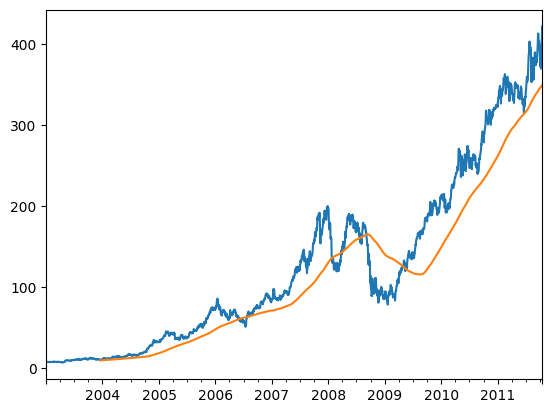

In [8]:
close_px['AAPL'].plot()

# Rolling operator, behaves similarly to resample and groupby. 
# 250 is creating a 250 business days of moving window
# Here, we have the 250-day moving window average of Apple's stock price
close_px['AAPL'].rolling(250).mean().plot()

In [14]:
std250 = close_px['AAPL'].pct_change()
std250[std250.isna()]

2003-01-02   NaN
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot: >

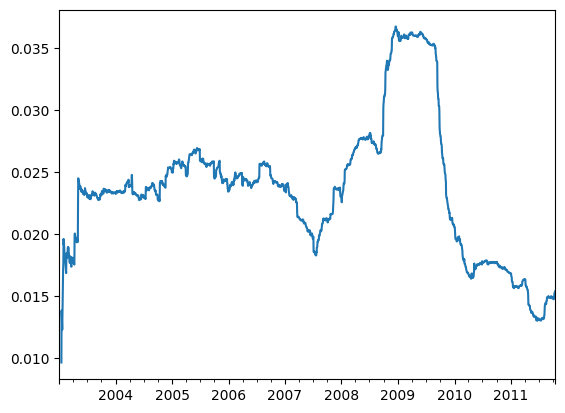

In [10]:
std250 = close_px['AAPL'].pct_change().rolling(250, min_periods=10).std()

std250.plot()

<AxesSubplot: >

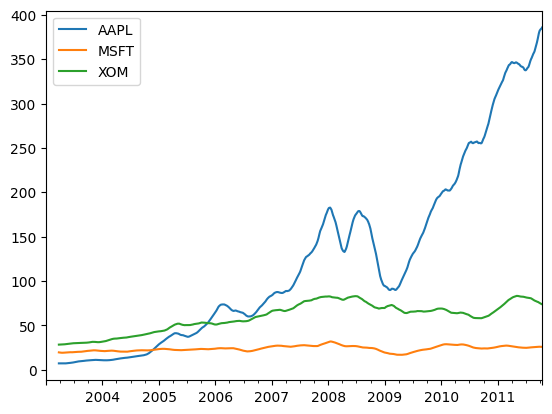

In [16]:
# Calling moving window function on a dataframe apoplies the transformation to each column
close_px.rolling(60).mean().plot()

## Exponentially Weighted Functions
Using a fixed window size with equally weighted observations - specify a constant decay factor to give more weight to more recent observations. 

pandas ewm operator (exponentially weighted moving)



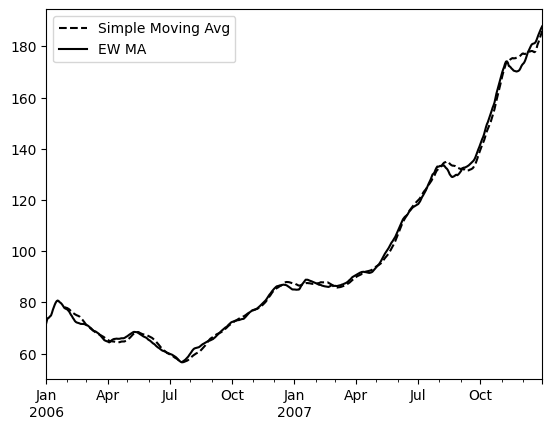

In [22]:
appl_px = close_px["AAPL"]["2006":"2007"]

ma30 = appl_px.rolling(30, min_periods=20).mean()

ewma30 = appl_px.ewm(span=30).mean()

appl_px.plot(style='k-', label="Price")

ma30.plot(style='k--', label="Simple Moving Avg")

ewma30.plot(style='k-', label="EW MA")

plt.legend()

## Binary Moving Window Functions

correlations and covariance need to operate on two time series.

In [27]:
spx_px = close_px_all['SPX']

spx_rets = spx_px.pct_change()

returns = close_px.pct_change()

<AxesSubplot: >

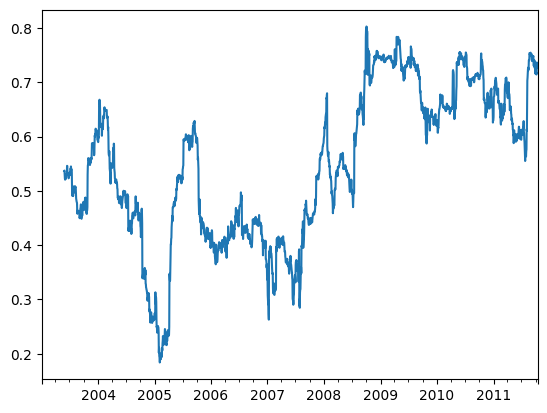

In [30]:
corr = returns['AAPL'].rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

<AxesSubplot: >

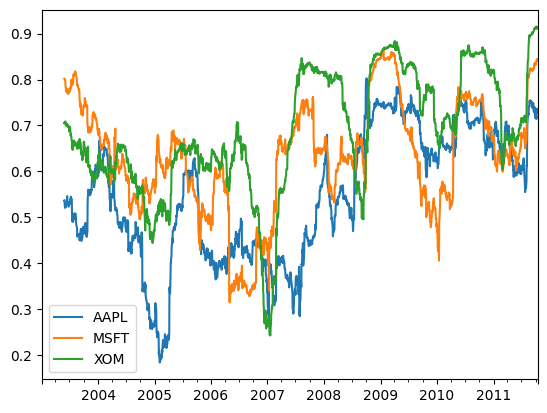

In [31]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

corr.plot()

## User-Defined Moving Window Functions
To apply methods on rolling and related methods. Apply an array function. 


<AxesSubplot: >

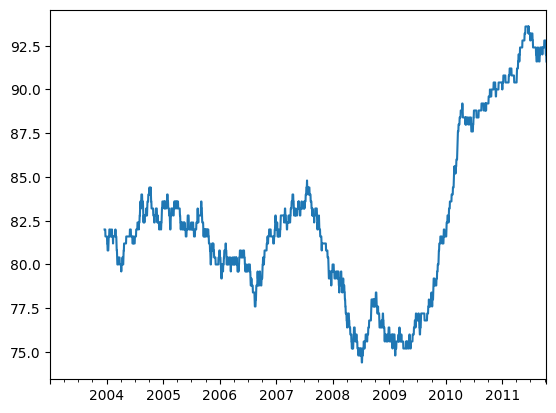

In [32]:
from scipy.stats import percentileofscore

def score_at_2percent(x):
	return percentileofscore(x, 0.02)

result = returns['AAPL'].rolling(250).apply(score_at_2percent)

result.plot()